In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os
cwd = os.getcwd()
cwd

'/work/bde/Git/Informer2020'

In [2]:
PATH = cwd
# NYU-METS-BUS_LINES
#DATA = 'informer_4G_bus_ftMS_sl64_ll32_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

#BerlinV2X
DATA = 'informer_5G_berlin_ftMS_sl64_ll32_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

UNIVARIATE = True
shift_by = 1
span = 8

In [3]:
metrics = np.load(f'{PATH}/results/{DATA}/metrics.npy')
metrics

array([7.38870250e+06, 1.20633208e+14, 1.09833150e+07, 1.03473194e-01,
       2.71668322e-02], dtype=float32)

In [4]:
real_prediction = np.load(f'{PATH}/results/{DATA}/real_prediction.npy')
real_prediction

array([[[2.2090842e+08]]], dtype=float32)

In [5]:
true = np.load(f'{PATH}/results/{DATA}/true.npy')
print(true.shape)
pred = np.load(f'{PATH}/results/{DATA}/pred.npy')
print(pred.shape)

(3904, 1, 1)
(3904, 1, 1)


In [6]:
#if UNIVARIATE:
truth = 'Ground Truth'
prediction = 'BandFormer'
df = pd.DataFrame({truth: true.flatten(), prediction: pred.flatten()})

df['Shifted'] = df[truth].shift(shift_by)
df['SMA'] = df[truth].rolling(span).mean()
df['EWMA8'] = df[truth].ewm(span=span, adjust=True).mean()

df.head(20)

,Ground Truth,BandFormer,Shifted,SMA,EWMA8
0,235000000.0,195983776.0,NaN,NaN,2.350000e+08
1,200000000.0,191876704.0,235000000.0,NaN,2.153125e+08
2,232000000.0,195791552.0,200000000.0,NaN,2.223161e+08
3,225000000.0,175154080.0,232000000.0,NaN,2.232567e+08
4,209000000.0,184762752.0,225000000.0,NaN,2.188280e+08
5,213000000.0,188276608.0,209000000.0,NaN,2.171647e+08
6,188000000.0,185842656.0,213000000.0,NaN,2.093356e+08
7,174000000.0,174401616.0,188000000.0,209500000.0,2.002691e+08
8,126000000.0,154392544.0,174000000.0,195875000.0,1.818459e+08
9,152000000.0,160292896.0,126000000.0,189875000.0,1.746288e+08


used true[1:], pred[1:] and shifted[1:]
rmse for true vs pred: 10917422.0, true vs shifted 16377189.0, true vs sma 21889280.084625974, true vs ewm 17805509.64788956
mse for true vs pred: 119190107193344.0, true vs shifted 268212335804416.0, true vs sma 479140582623203.3, true vs ewm 317036173821088.2
mae for true vs pred: 7356463.5, true vs shifted 11118399.0, true vs sma 15331928.901437372, true vs ewm 12620569.83098088


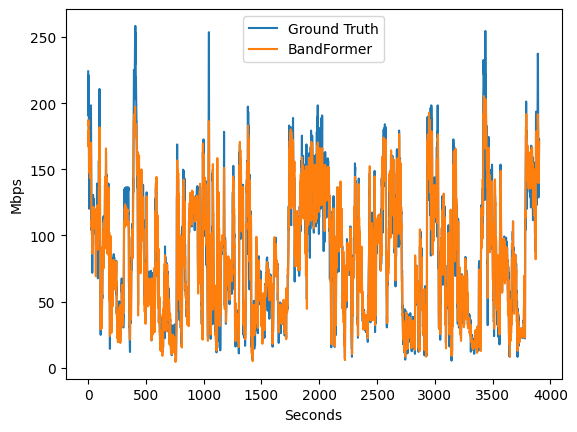

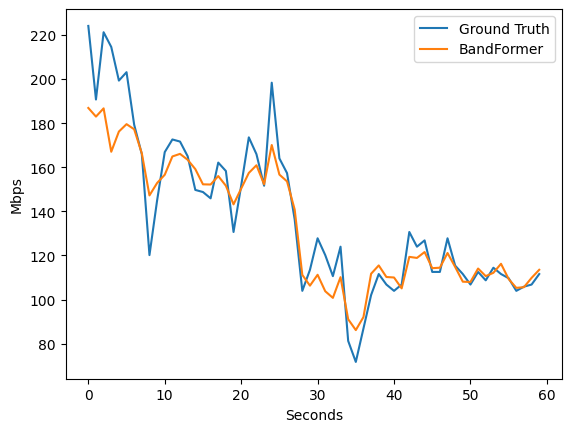

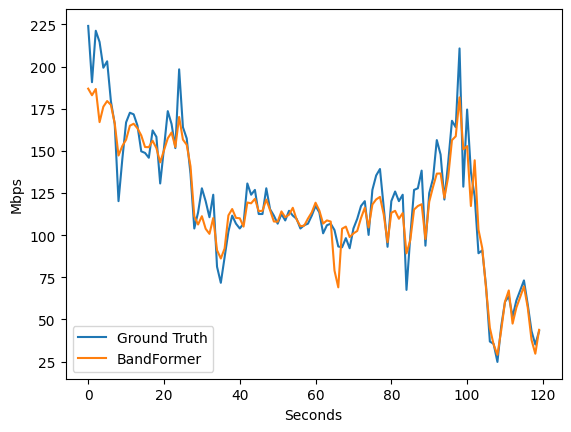

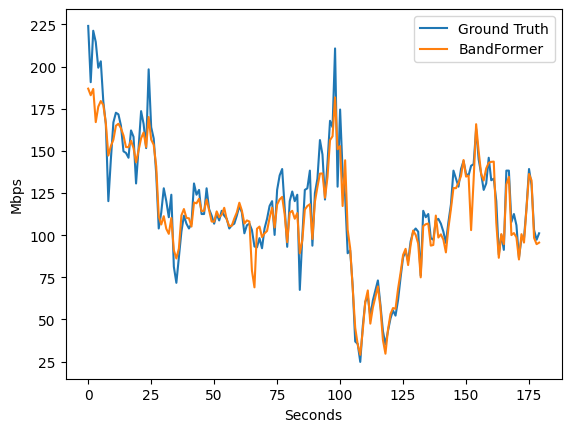

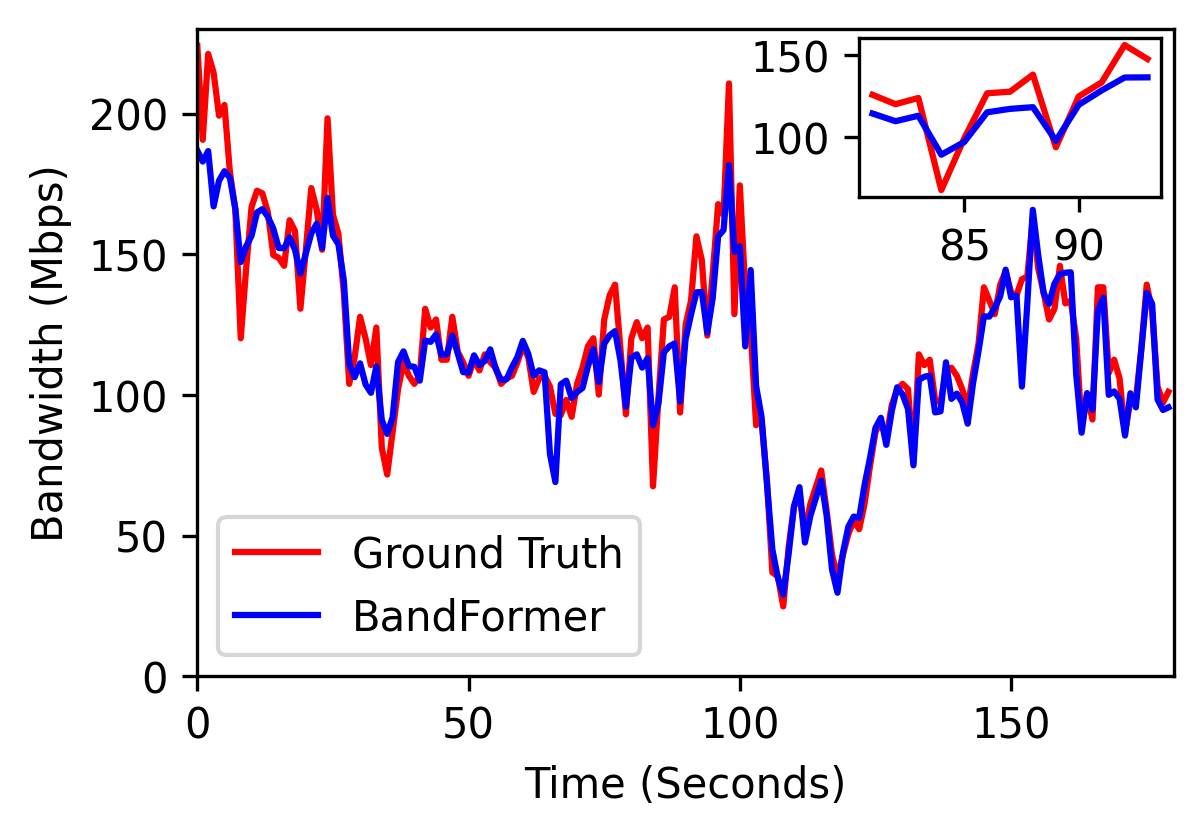

In [7]:
rmse_t_p = mean_squared_error(df[truth][span:], df[prediction][span:], squared=False)
rmse_t_s = mean_squared_error(df[truth][span:], df["Shifted"][span:], squared=False)
rmse_t_sm = mean_squared_error(df[truth][span:], df["SMA"][span:], squared=False)
rmse_t_ewm = mean_squared_error(df[truth][span:], df["EWMA8"][span:], squared=False)

mse_t_p = mean_squared_error(df[truth][span:], df[prediction][span:])
mse_t_s = mean_squared_error(df[truth][span:], df["Shifted"][span:])
mse_t_sm = mean_squared_error(df[truth][span:], df["SMA"][span:])
mse_t_ewm = mean_squared_error(df[truth][span:], df["EWMA8"][span:])

mae_t_p = mean_absolute_error(df[truth][span:], df[prediction][span:])
mae_t_s = mean_absolute_error(df[truth][span:], df["Shifted"][span:])
mae_t_sm = mean_absolute_error(df[truth][span:], df["SMA"][span:])
mae_t_ewm = mean_absolute_error(df[truth][span:], df["EWMA8"][span:])

print('used true[1:], pred[1:] and shifted[1:]')
print(f'rmse for true vs pred: {rmse_t_p}, true vs shifted {rmse_t_s}, true vs sma {rmse_t_sm}, true vs ewm {rmse_t_ewm}')
print(f'mse for true vs pred: {mse_t_p}, true vs shifted {mse_t_s}, true vs sma {mse_t_sm}, true vs ewm {mse_t_ewm}')
print(f'mae for true vs pred: {mae_t_p}, true vs shifted {mae_t_s}, true vs sma {mae_t_sm}, true vs ewm {mae_t_ewm}')

df = df[[truth, prediction]]
df[truth] = df[truth].div(1024*1024)
df[prediction] = df[prediction].div(1024*1024)

ylabel = 'Mbps' #Kbps
""" fig_size = (6, 3)
df.plot(figsize=fig_size) """
df.plot()
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel) #
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.4, 0.4))
plt.savefig(f'plots/{DATA}-full.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-full.png', bbox_inches='tight')

scope = 60
df.head(scope).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope}.png', bbox_inches='tight')

scope2 = scope *2
df.head(scope2).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope2}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope2}.png', bbox_inches='tight')

scope3 = scope *3
df.head(scope3).plot()#figsize=fig_size)
#plt.title('Prediction on LTE dataset')
# adding Label to the x-axis
plt.xlabel('Seconds')
plt.ylabel(ylabel)
# adding legend to the curve
plt.legend()#bbox_to_anchor=(0.21, 0.4))
plt.savefig(f'plots/{DATA}-{scope3}.pdf', bbox_inches='tight')
plt.savefig(f'plots/{DATA}-{scope3}.png', bbox_inches='tight')

fig, ax1 = plt.subplots(figsize=(1.5*2.8, 1*2.8), dpi=300)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('Bandwidth (Mbps)')
ax1.set_xlim(left=0, right=180)
ax1.set_ylim(bottom=0, top=230)
#plt.xlabel('Seconds')
#plt.ylabel('Bandwidth (Mbps)')
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.68, 0.24, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=80, right=90)
#ax2.set_ylim(bottom=0, top=160)
# Plot
ax1.plot(df[truth][:scope3] , color="red", label=truth)
ax1.plot(df[prediction][:scope3], color="blue", label=prediction)
ax1.legend(loc='lower left')

scope4_s = 81
scope4_e = 94
ax2.plot(df[truth][scope4_s:scope4_e], color="red", label=truth)
ax2.plot(df[prediction][scope4_s:scope4_e], color="blue", label=prediction)
#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.png', bbox_inches='tight')

In [8]:
if not UNIVARIATE:
    df_true = pd.DataFrame.from_records(true)
    df_pred = pd.DataFrame.from_records(pred)
    df_shifted = df_true.shift(shift_by)

    print(f'used df_true[{shift_by}:], df_pred[{shift_by}:] and shifted[{shift_by}:]')
    print(f'rmse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:], squared=False)}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:], squared=False)}')
    print(f'mae for true vs pred: {mean_absolute_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_absolute_error(df_true[shift_by:], df_shifted[shift_by:])}')
    print(f'mse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:])}')

    #plt.figure(figsize=(16, 8), dpi=150)

    #df_true_0.plot(subplots=True, label='true')
    #df_pred_0.plot(subplots=True, label='pred')

    #plt.title('Informer Multivariate')
    # adding Label to the x-axis
    #plt.xlabel('Years')
    # adding legend to the curve
    #plt.legend()